In [1]:
from optimum.intel.openvino import OVModelForVisualCausalLM
from transformers import AutoProcessor, TextStreamer, AutoModelForCausalLM
from PIL import Image
from io import BytesIO
from pathlib import Path
import requests

<frozen importlib.util>:247: DeprecationWarning: The `openvino.runtime` module is deprecated and will be removed in the 2026.0 release. Please replace `openvino.runtime` with `openvino`.


In [2]:
ov_model_path = "ov-gemma-3-4b-it"
device="CPU"

model = OVModelForVisualCausalLM.from_pretrained(ov_model_path, device=device)
processor = AutoProcessor.from_pretrained(ov_model_path)


Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [4]:
def load_image(image_file):
    if isinstance(image_file, str) and (image_file.startswith("http") or image_file.startswith("https")):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image

In [5]:
image_file = Path("COCO_val2014_000000125211.jpg")
text_message = "What is unusual on this image?"
image = load_image(image_file)
inputs = model.preprocess_inputs(text=text_message, image=image, processor=processor)


Question:
What is unusual on this image?


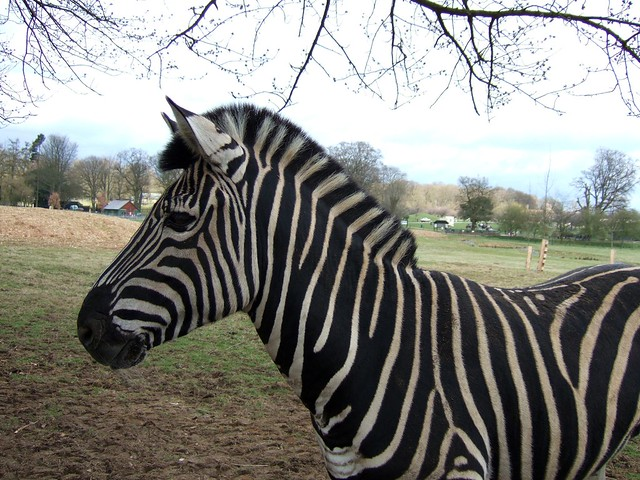

Answer:


/root/miniforge3/envs/ov-multimodal/lib/python3.11/site-packages/transformers/generation/utils.py:1743: UserWarning: This model does not support `Cache` instances, it only supports the legacy cache format (tuple of tuples). `cache_implementation` (set to hybrid) will be ignored.
  warnings.warn(


Here's what's unusual about the image:

*   **The Zebra's Perspective:** The photo is taken from a very low angle, looking up at the zebra. This is quite rare and gives the zebra a towering, almost imposing presence. It's not a typical way to photograph a zebra.

Let me know if you'd like me to analyze anything else about the image!


tensor([[     2,      2,    105,   2364,    109, 255999, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144, 262144,
         262144, 262144, 262

In [6]:
print(f"Question:\n{text_message}")
display(image)

print("Answer:")
model.generate(**inputs, do_sample=False, max_new_tokens=128, streamer=TextStreamer(processor.tokenizer, skip_prompt=True, skip_special_tokens=True))


In [7]:
from gradio_helper import make_demo

demo = make_demo(model, processor)

try:
    demo.launch(debug=True)
except Exception:
    demo.launch(share=True, debug=True)

/root/miniforge3/envs/ov-multimodal/lib/python3.11/site-packages/websockets/legacy/__init__.py:6: DeprecationWarning: websockets.legacy is deprecated; see https://websockets.readthedocs.io/en/stable/howto/upgrade.html for upgrade instructions
  warnings.warn(  # deprecated in 14.0 - 2024-11-09
/root/miniforge3/envs/ov-multimodal/lib/python3.11/site-packages/uvicorn/protocols/websockets/websockets_impl.py:17: DeprecationWarning: websockets.server.WebSocketServerProtocol is deprecated
  from websockets.server import WebSocketServerProtocol


* Running on local URL:  http://127.0.0.1:7860
Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


Keyboard interruption in main thread... closing server.
